1. Get rid of Warnings and import libraries/files

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('nyc-rolling-sales.csv.zip')
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

2. Determine what type of variables you have

In [ ]:
'''Remove Unnamed: 0 column because it is irrelevant'''
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [ ]:
for col in df.columns:
    print(col, df[col].nunique())

BOROUGH 5
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
BLOCK 11566
LOT 2627
EASE-MENT 1
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
APARTMENT NUMBER 3989
ZIP CODE 186
RESIDENTIAL UNITS 176
COMMERCIAL UNITS 55
TOTAL UNITS 192
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
YEAR BUILT 158
TAX CLASS AT TIME OF SALE 4
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


In [ ]:
df.nunique()

BOROUGH                               5
NEIGHBORHOOD                        254
BUILDING CLASS CATEGORY              47
TAX CLASS AT PRESENT                 11
BLOCK                             11566
LOT                                2627
EASE-MENT                             1
BUILDING CLASS AT PRESENT           167
ADDRESS                           67563
APARTMENT NUMBER                   3989
ZIP CODE                            186
RESIDENTIAL UNITS                   176
COMMERCIAL UNITS                     55
TOTAL UNITS                         192
LAND SQUARE FEET                   6062
GROSS SQUARE FEET                  5691
YEAR BUILT                          158
TAX CLASS AT TIME OF SALE             4
BUILDING CLASS AT TIME OF SALE      166
SALE PRICE                        10008
SALE DATE                           364
dtype: int64

In [ ]:
df['SALE DATE']= pd.to_datetime(df['SALE DATE'], errors='coerce')

Figure belows shows that majority of sales happened in 2017. June of 2017 had the most sales while August of 2017 had the least.

In [ ]:
df['sale_year'] = pd.DatetimeIndex(df['SALE DATE']).year.astype("category")
df['sale_month'] = pd.DatetimeIndex(df['SALE DATE']).month.astype("category")
pd.crosstab(df['sale_month'],df['sale_year'])

sale_year,2016,2017
sale_month,,
1,0,6871
2,0,6323
3,0,7705
4,0,6402
5,0,7461
6,0,8293
7,0,6319
8,0,5681
9,7779,0


3. Change/Update the variable type(s)

In [ ]:
'''numeric data types'''
numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" , "GROSS SQUARE FEET","SALE PRICE" ]

for col in numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
'''categorical data types'''
categorical = ["BOROUGH","NEIGHBORHOOD",'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT','ZIP CODE', 'YEAR BUILT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']

for col in categorical:
    df[col] = df[col].astype("category")

Figure below shows the new data types that we updated!

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   EASE-MENT                       84548 non-null  object        
 7   BUILDING CLASS AT PRESENT       84548 non-null  category      
 8   ADDRESS                         84548 non-null  object        
 9   APARTMENT NUMBER                84548 non-null  object        
 10  ZIP CODE                        84548 non-null  category      
 11  RE

In [ ]:
## df.describe(include='all').T - too many variables?

4. Missing Variables

In [ ]:
df.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
sale_year                             0
sale_month                            0
dtype: int64

The figure below is the percentage version of the figure above. This is so we can get the percentage of NA's.

In [ ]:
df.replace(' ',np.nan, inplace=True)
df.isna().sum() /len(df) *100

BOROUGH                             0.000000
NEIGHBORHOOD                        0.000000
BUILDING CLASS CATEGORY             0.000000
TAX CLASS AT PRESENT                0.872877
BLOCK                               0.000000
LOT                                 0.000000
EASE-MENT                         100.000000
BUILDING CLASS AT PRESENT           0.872877
ADDRESS                             0.000000
APARTMENT NUMBER                   77.466055
ZIP CODE                            0.000000
RESIDENTIAL UNITS                   0.000000
COMMERCIAL UNITS                    0.000000
TOTAL UNITS                         0.000000
LAND SQUARE FEET                   31.049818
GROSS SQUARE FEET                  32.658372
YEAR BUILT                          0.000000
TAX CLASS AT TIME OF SALE           0.000000
BUILDING CLASS AT TIME OF SALE      0.000000
SALE PRICE                         17.222170
SALE DATE                           0.000000
sale_year                           0.000000
sale_month

Figure below is a visual for the figure above. They are both stating that "Easement" and "Apartment Number" have lots of NA values (Easement NA value % = 100%) (Apartment Number Na Value % = 77%). "Land Square Feet," "Gross Square Feet," and "Sale Price" are all higher than what we want them to be, but significantly lower than "Easement" and "Apartment Number."

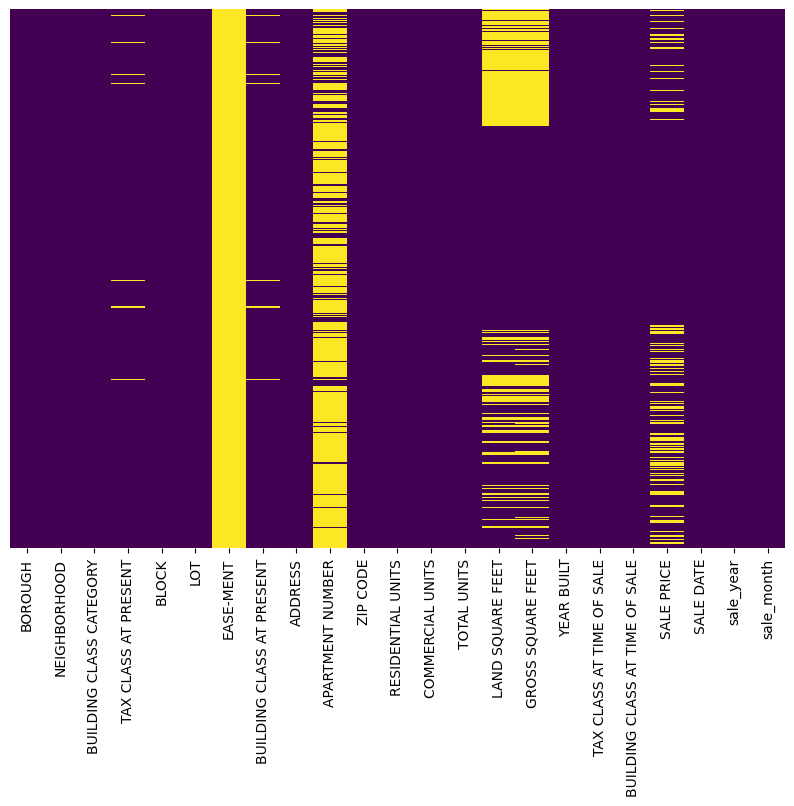

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [ ]:
'''Drop Easement and Apartment Number because they are full of NA values'''
df.drop(["EASE-MENT","APARTMENT NUMBER"], axis=1, inplace=True)

In [ ]:
''' Drop the NA values in "Land Square Feet, "Gross Square Feet," and "Sale Price,"
because they are not variables we have to keep (we should keep them if we can though). '''

' Drop the NA values in "Land Square Feet, "Gross Square Feet," and "Sale Price,"\nbecause they are not variables we have to keep (we should keep them if we can though). '

In [ ]:
df=df.dropna()

In [ ]:
''' duplicates? If so, need to drop'''

' duplicates? If so, need to drop'

In [ ]:
sum(df.duplicated())

348

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
''' Convert everything to numeric on a temp sheet and look at description for anything strange.'''
temp = df.copy()
for cols in temp.columns:
    temp[cols]=pd.to_numeric(temp[cols], errors='coerce')

temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47544 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         47544 non-null  int64  
 1   NEIGHBORHOOD                    0 non-null      float64
 2   BUILDING CLASS CATEGORY         0 non-null      float64
 3   TAX CLASS AT PRESENT            42401 non-null  float64
 4   BLOCK                           47544 non-null  int64  
 5   LOT                             47544 non-null  int64  
 6   BUILDING CLASS AT PRESENT       0 non-null      float64
 7   ADDRESS                         0 non-null      float64
 8   ZIP CODE                        47544 non-null  int64  
 9   RESIDENTIAL UNITS               47544 non-null  int64  
 10  COMMERCIAL UNITS                47544 non-null  int64  
 11  TOTAL UNITS                     47544 non-null  int64  
 12  LAND SQUARE FEET                47544

In [ ]:
temp.describe().T

,count,mean,std,min,25%,50%,75%,max
BOROUGH,47544.0,3.256836e+00,9.049520e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
NEIGHBORHOOD,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BUILDING CLASS CATEGORY,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TAX CLASS AT PRESENT,42401.0,1.428646e+00,8.524710e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
BLOCK,47544.0,4.993789e+03,3.431769e+03,1.000000e+00,2.218000e+03,4.666000e+03,6.983750e+03,1.631900e+04
LOT,47544.0,2.278511e+02,4.906937e+02,1.000000e+00,2.100000e+01,4.500000e+01,9.000000e+01,9.009000e+03
BUILDING CLASS AT PRESENT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADDRESS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZIP CODE,47544.0,1.098669e+04,8.016274e+02,0.000000e+00,1.047000e+04,1.121700e+04,1.123800e+04,1.169400e+04
RESIDENTIAL UNITS,47544.0,2.553656e+00,1.723198e+01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.844000e+03


Figure above shows the stats for all of the variables. There are some zeros in the min that look strange. For example, you can't have a "Year Built" as zero. That doesn't make any sense. In the lecture video, we talked about how the count number needs to match up. The only count value that doesn't match its data type "siblings" is "TAX CLASS AT PRESENT." That is something to keep note of, but probably isn't going to be too big of a deal because the count for "TAX CLASS AT TIME OF SALE" matches up.

In [ ]:
df[(df['SALE PRICE']<10000) | (df['SALE PRICE']>10000000)]['SALE PRICE'].count() /len(df)

0.24310112737674575

In [ ]:
df2= df[(df['SALE PRICE']>10000) & (df['SALE PRICE']<10000000)].copy()
df2['SALE PRICE'].describe()

count    3.592500e+04
mean     8.781402e+05
std      1.033943e+06
min      1.000100e+04
25%      4.000000e+05
50%      6.100000e+05
75%      9.418810e+05
max      9.999999e+06
Name: SALE PRICE, dtype: float64

The code lines above this show that almost 25% of sale prices are either less than 10,000 or greater than 10,000,000. This is a good indicator that our distribution, for this variable, is not evenly/normally distributed. The figure below shows us a visual of the data in that variable. This figure shows that the data is significantly right skewed. This means that there are more extreme values in the higher numbers that are "pulling" our data towards those higher numbers.

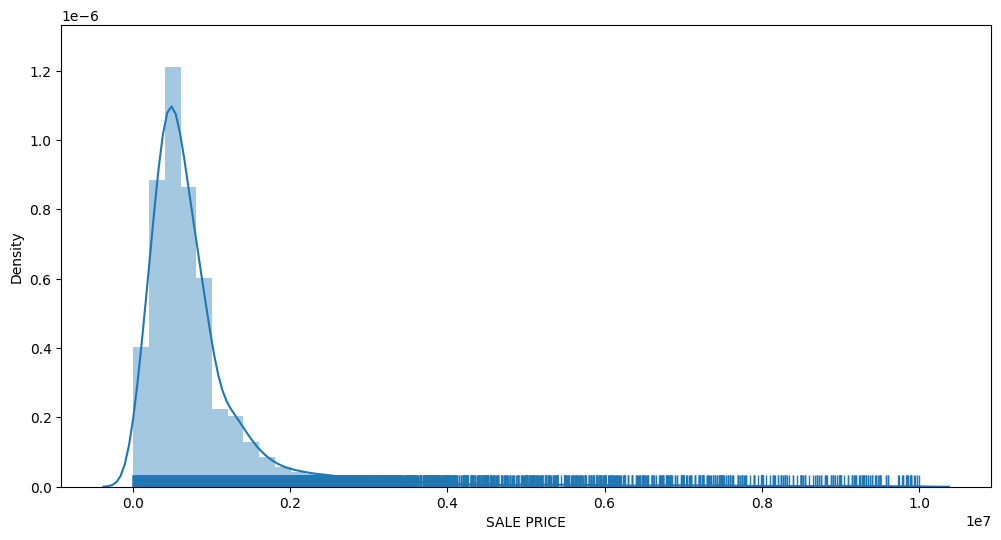

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df2['SALE PRICE'], kde=True, bins=50, rug=True)
plt.show()

The figure below is very similar to the one above. The main difference is that the figure doesn't plot an data points, for the "Sale Price" variable, that are higher than 4,000,000. Which you can see at the "Rugs" (little tally marks at bottom of graph).

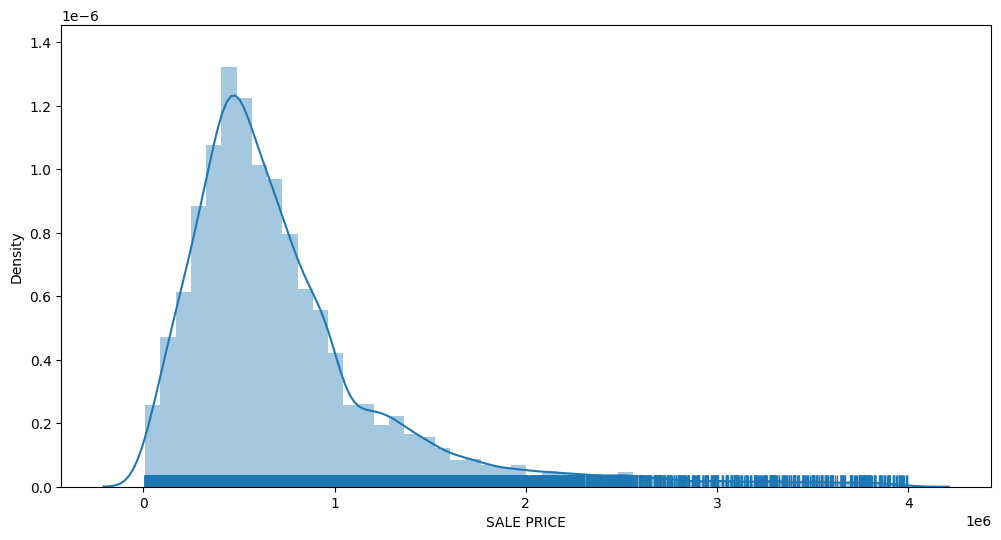

In [ ]:
df2= df2[(df2['SALE PRICE']<4000000)]
plt.figure(figsize=(12,6))
sns.distplot(df2['SALE PRICE'], kde=True, bins=50, rug=True)
plt.show()

In [ ]:
df2[df2['YEAR BUILT']==0]['YEAR BUILT'].count()

1434

The above line of code is showing us how many zero entries we have on 'Year Built.' The figure below shows us only the data points where the entry for this variable does not equal zero. This gives us an excellent, comprehendable, visual of the data.

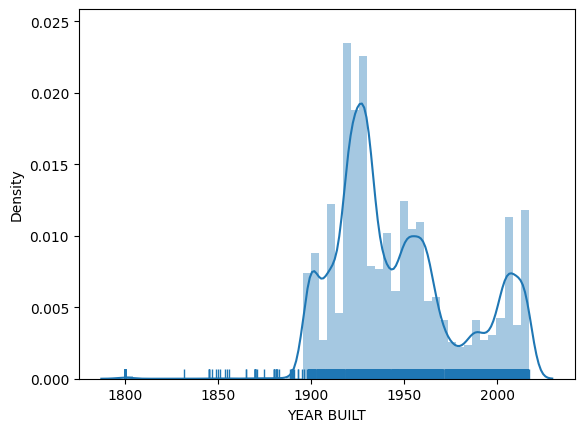

In [ ]:
df3=df2[df2['YEAR BUILT']!=0].copy()
sns.distplot(df3['YEAR BUILT'], bins=50, rug=True)
plt.show()

In [ ]:
df3[df3['TOTAL UNITS']==0]['TOTAL UNITS'].count()

3426

The is the exact same things as above, the only difference is now, instead of the 'Year Built' variable, this is for 'Total Units.' The top line of code is showing us how many zero entries we have on 'Total Units' The figure below shows us only the data points where the entry for this variable does not equal zero. This gives us an excellent, comprehendable, visual of the data.

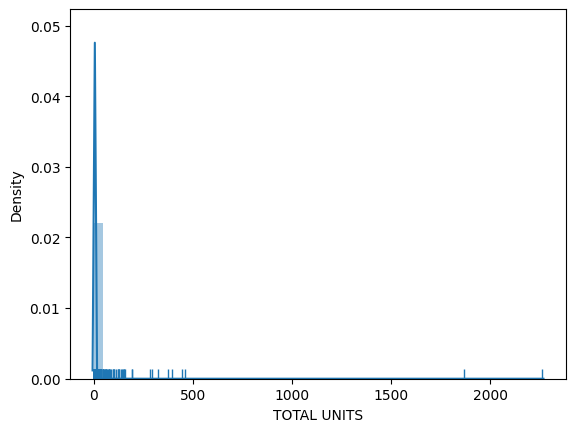

In [ ]:
df4=df3[df3['TOTAL UNITS']!=0].copy()
sns.distplot(df4['TOTAL UNITS'], bins=50, rug=True)
plt.show()

5. Finalize Data

The above line of code is showing us how many zero entries we have on 'Year Built.' The figure below shows us only the data points where the entry for this variable does not equal zero. This gives us an excellent, comprehendable, visual of the data.

In [ ]:
df4.describe().T

,count,mean,min,25%,50%,75%,max,std
BLOCK,30236.0,5418.821835,1.0,2395.0,4836.0,7677.0,16319.0,3753.775464
LOT,30236.0,185.704987,1.0,22.0,44.0,83.0,3597.0,384.518819
RESIDENTIAL UNITS,30236.0,1.970532,0.0,1.0,1.0,2.0,1844.0,12.586963
COMMERCIAL UNITS,30236.0,0.173039,0.0,0.0,0.0,0.0,2261.0,13.034598
TOTAL UNITS,30236.0,2.147804,1.0,1.0,1.0,2.0,2261.0,18.198705
LAND SQUARE FEET,30236.0,3133.582088,0.0,1816.5,2417.0,3500.0,4228300.0,27966.319284
GROSS SQUARE FEET,30236.0,2440.363276,0.0,1208.0,1680.0,2392.0,3750565.0,23800.244758
SALE PRICE,30236.0,793820.011146,10001.0,436000.0,630000.0,940000.0,3995000.0,594725.186839
SALE DATE,30236,2017-02-26 02:36:26.955946496,2016-09-01 00:00:00,2016-11-30 00:00:00,2017-02-27 00:00:00,2017-05-26 00:00:00,2017-08-31 00:00:00,NaN


a

In [ ]:
df4.info()


<class 'pandas.core.frame.DataFrame'>
Index: 30236 entries, 3 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         30236 non-null  category      
 1   NEIGHBORHOOD                    30236 non-null  category      
 2   BUILDING CLASS CATEGORY         30236 non-null  category      
 3   TAX CLASS AT PRESENT            30236 non-null  category      
 4   BLOCK                           30236 non-null  int64         
 5   LOT                             30236 non-null  int64         
 6   BUILDING CLASS AT PRESENT       30236 non-null  category      
 7   ADDRESS                         30236 non-null  object        
 8   ZIP CODE                        30236 non-null  category      
 9   RESIDENTIAL UNITS               30236 non-null  int64         
 10  COMMERCIAL UNITS                30236 non-null  int64         
 11  TOTAL U

In [ ]:
df4.drop(['BLOCK','LOT','ADDRESS'], axis=1, inplace=True)

In [ ]:
#'1':'Manhattan', '2':'Bronx', '3': 'Brooklyn', '4':'Queens','5':'Staten Island'
df4['BOROUGH']= df4['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})
df4.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,sale_year,sale_month
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,2016,9
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,2016,9
172,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,S3,10009,3,1,4,1520.0,3360.0,1910,2,S3,3300000.0,2016-11-15,2016,11
195,Manhattan,ALPHABET CITY,22 STORE BUILDINGS,4,K4,10009,0,1,1,1218.0,3586.0,1899,4,K4,3700000.0,2016-09-28,2016,9
222,Manhattan,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,C4,10011,9,0,9,1566.0,6330.0,1901,2,C4,1583840.0,2017-08-31,2017,8


The table above is specifically in regards to Manhatten. This above table provides a easy, comprehendable, visual to cross reference the variables with the Manahattan location.

In [ ]:
df_bar =df4[['BOROUGH', 'SALE PRICE']].groupby(by='BOROUGH').mean().sort_values(by='SALE PRICE', ascending=True).reset_index()
df_bar

,BOROUGH,SALE PRICE
0,Staten Island,5.257797e+05
1,Bronx,5.581147e+05
2,Queens,7.079732e+05
3,Brooklyn,1.039752e+06
4,Manhattan,1.846523e+06


The table above is showing how what the average sale price is for reach speicifc Borough, and the graph below provides the same information in a visualistic way.

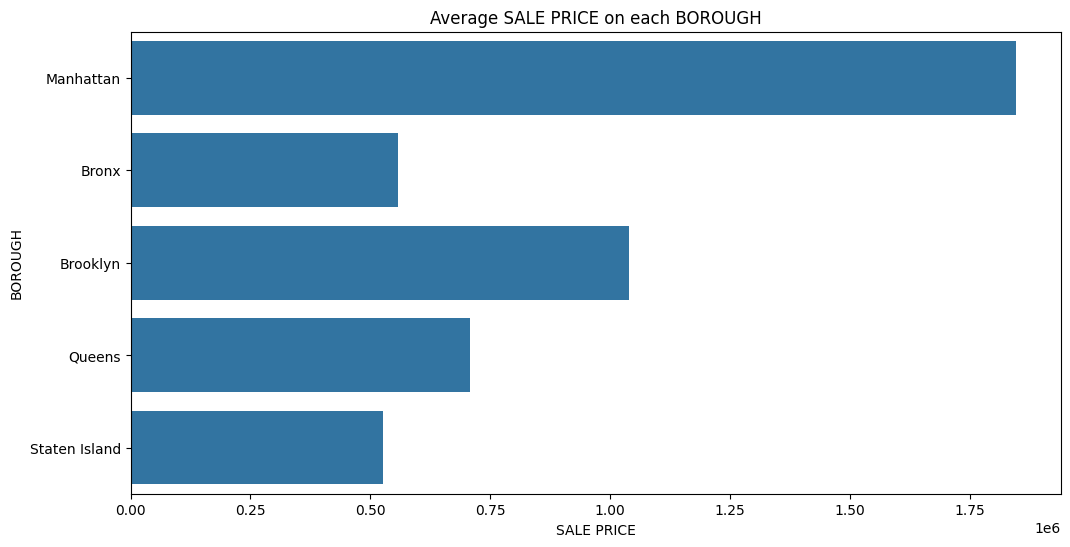

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y = 'BOROUGH', x = 'SALE PRICE', data = df_bar )
plt.title('Average SALE PRICE on each BOROUGH')
plt.show()

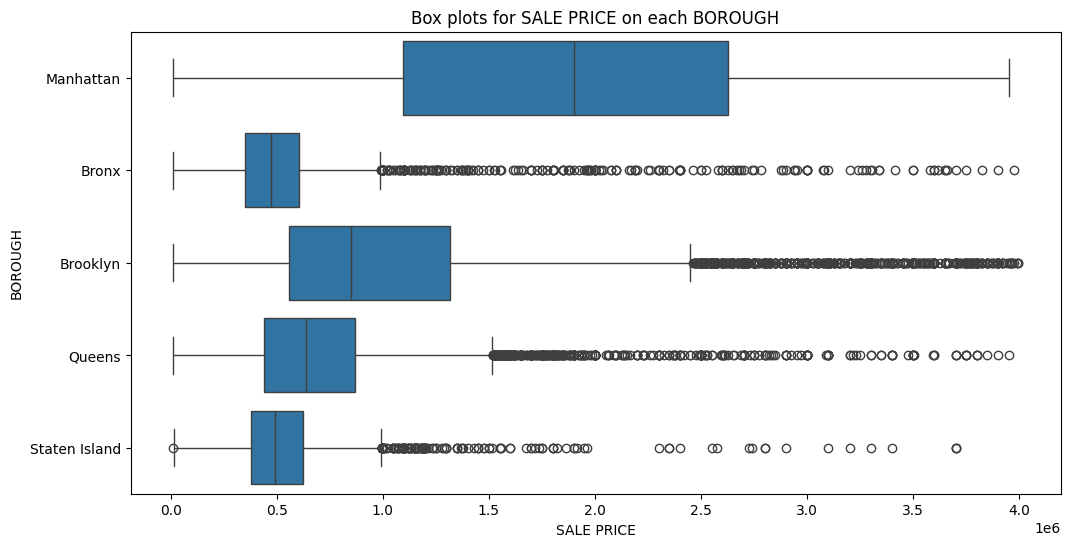

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'BOROUGH', x = 'SALE PRICE', data = df4 )
plt.title('Box plots for SALE PRICE on each BOROUGH')
plt.show()

The box plot provides an excellant visual on the sale price statistics to their specific areas of sales, (i,e, Staten Islan, Queens, etc. This box plot does a great job at showin that the data is extremely skewed.

In [ ]:
df_bar=df4[['sale_month', 'SALE PRICE']].groupby(by='sale_month').count().sort_values(by='sale_month', ascending=True).reset_index()
df_bar.columns.values[1]='Sales_count'
df_bar

,sale_month,Sales_count
0,1,2432
1,2,2323
2,3,2782
3,4,2344
4,5,2565
5,6,2931
6,7,2328
7,8,1937
8,9,2807
9,10,2373


The graph below does a great job at showing how many counts we have for that specific month! A better visualization for this could be a dual bar graph because the two different colots on the dual to specify what the year instead of just the month.  

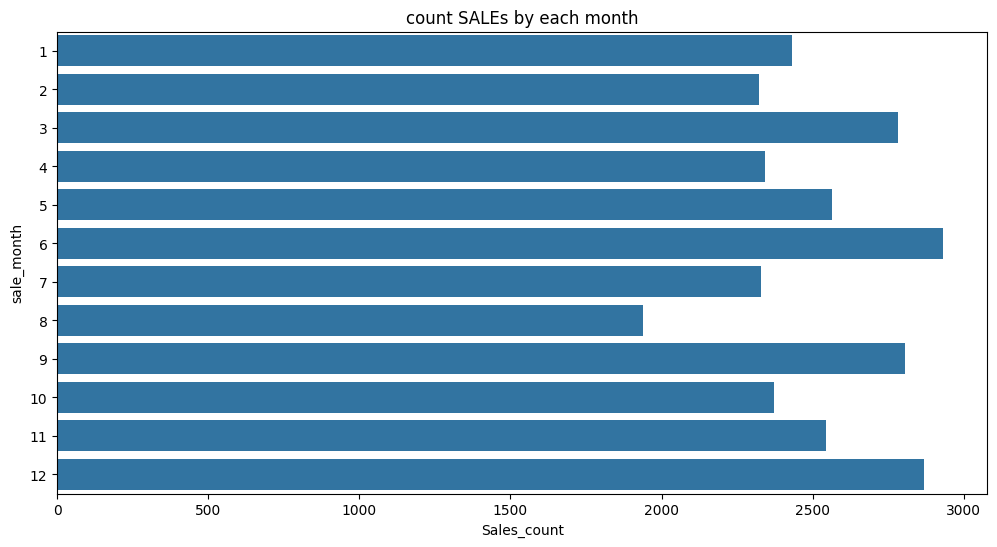

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y = 'sale_month', x = 'Sales_count', data = df_bar )
plt.title('count SALEs by each month')
plt.show()